### Import necessary libraries

In [1]:
# Basic Libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

mainData = pd.read_csv('clean_filter_dataframe.csv')
sb.set() # set the default Seaborn style for graphics
mainData.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
count,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,...,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000,4635.000000
mean,2007.369579,0.260723,0.139294,0.037282,0.048949,0.486453,70.496872,28.914995,7.216677,129.731607,...,0.089105,0.082848,0.073355,0.063646,0.064941,0.048975,0.035599,0.034736,0.027184,0.028263
std,4.069156,0.276439,0.183665,0.117220,0.068543,0.465979,12.903368,18.224541,1.381018,426.797953,...,0.284925,0.275682,0.260746,0.244148,0.246448,0.215839,0.185307,0.183129,0.162638,0.165742
min,1985.000000,0.000000,0.000000,0.000000,0.000000,0.010000,21.000000,3.000000,0.500000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2004.000000,0.070000,0.020000,0.000000,0.010000,0.140000,63.000000,15.000000,6.500000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.160000,0.060000,0.000000,0.020000,0.320000,72.000000,25.000000,7.500000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2010.000000,0.360000,0.190000,0.010000,0.060000,0.690000,80.000000,40.000000,8.200000,77.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.000000,1.820000,1.580000,1.490000,1.180000,2.070000,98.000000,106.000000,9.600000,10665.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
Critic_Scores = pd.DataFrame(mainData['Critic_Score'])
User_Scores = pd.DataFrame(mainData['User_Score'])
Global_Sales = pd.DataFrame(mainData['Global_Sales'])
Year_Release = pd.DataFrame(mainData['Year_of_Release'])
allcategory = mainData[['Action','Sports','Misc','Role-Playing','Shooter','Adventure','Racing','Simulation','Fighting','Strategy','Puzzle']]

### Linear Regression function

In [3]:
def linearRegression(predictor, response, testsize): # linearRegression(grlivarea, price,0.2)
    # train_test_split returns 4 values
    # Split the Dataset into Train and Test, with test_size= 0.2 if predictor total 1000, X_train: 800 data pts, X_test: 200 data pts 
    X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size = testsize)

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Predict Total values corresponding to HP
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

    plt.show()


We then tried using the linear models again to establish a relationship between variables and with Global Sales. 

### Linear Relation Between All Category and Global Sales

Intercept of Regression 	: b =  [0.52155844]
Coefficients of Regression 	: a =  [[-0.08250839 -0.0029634   0.04873568 -0.00079167 -0.00092464 -0.18694975
   0.0088686  -0.05563487  0.04547505 -0.21330669 -0.07400289]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.018331629312332898
Mean Squared Error (MSE) 	: 0.2112962622806261

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.005093182753806658
Mean Squared Error (MSE) 	: 0.22330224520279945



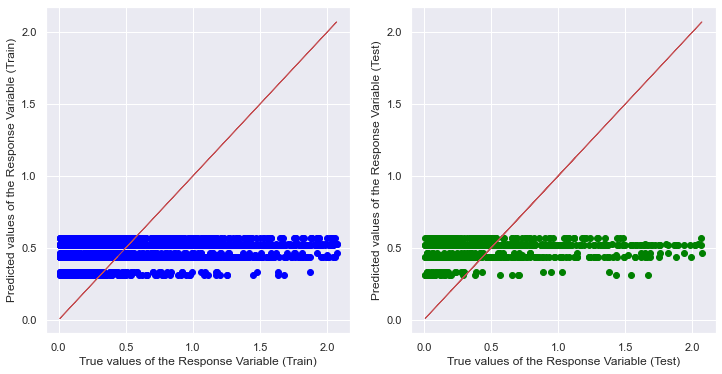

In [4]:
linearRegression(allcategory, Global_Sales ,0.2)

### Linear Relation Between User Score and Global Sales

Intercept of Regression 	: b =  [0.16814696]
Coefficients of Regression 	: a =  [[0.04484974]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.016368446660822045
Mean Squared Error (MSE) 	: 0.21878432962897829

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.014617565746653183
Mean Squared Error (MSE) 	: 0.19189558461654171



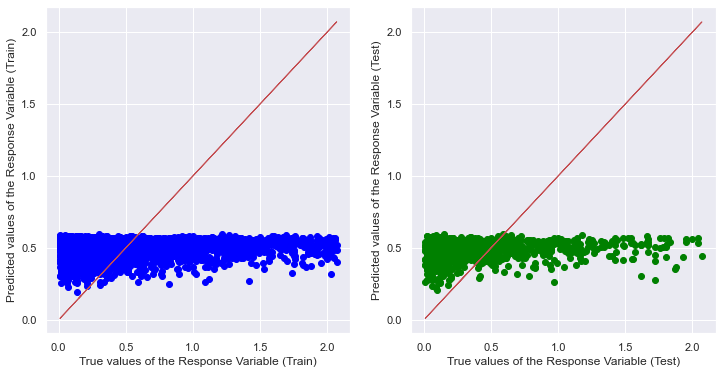

In [5]:
linearRegression(User_Scores, Global_Sales,0.2)

### Linear Relation Between Critic Scores and Global Sales

Intercept of Regression 	: b =  [-0.2798792]
Coefficients of Regression 	: a =  [[0.01084182]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.09044742386101678
Mean Squared Error (MSE) 	: 0.1950502250792333

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.0881399797628949
Mean Squared Error (MSE) 	: 0.20740426869626347



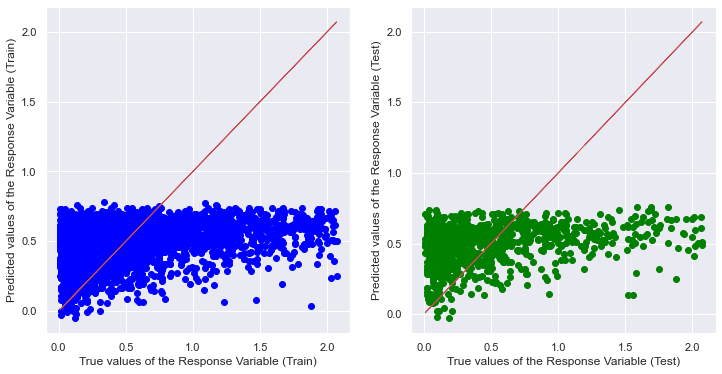

In [6]:
linearRegression(Critic_Scores, Global_Sales ,0.2)

There is a huge improvement in the correlation between User Score against Global Sales and Critic Score against Global Sales, however it is still not a satisfactory correlation.